In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [74]:
def kernel(E, tau, beta):
    x = beta*E / 2
    y = 2.0*tau / beta - 1
    if -100.0 < x < 100.0:
        G = np.exp(-x * y) / (2 * np.cosh(x))
    elif x >= 100.0:
        G = np.exp(-x * (y + 1))
    else: # x<=-100.0
        G = np.exp(x * (1 - y))
    return G

In [75]:
def Polarisi(q,w,EF):
    """ Polarization P(q,iW) on imaginary axis. Note that the result is real.
        It works on arrays of frequency, i.e., w can be array of bosonic Matsubara points.
    """
    kF = np.sqrt(EF)
    q2 = q**2
    kFq = 2*kF*q
    D = 1./(8.*kF*q)
    
    if type(w)==np.ndarray:
        res = zeros(len(w),dtype=float)
        
        # careful for small q or large w
        is_w_large = w > 20*(q2+kFq) # for w[i>=iw_start] we should use power expansion
        iw_start = len(w)  # if this was newer true, is_w_large contains only False => iw_start=len(w)
        if is_w_large[-1] : # If at least the last frequency is larger than the cutoff, we can find the index
            iw_start = argmax( is_w_large )
        
        # if w < cutoff use exact expression
        iw = w[:iw_start]*1j
        wmq2 = iw-q2
        wpq2 = iw+q2
        C1 = np.log(wmq2-kFq)-np.log(wmq2+kFq)
        C2 = np.log(wpq2-kFq)-np.log(wpq2+kFq)
        res[:iw_start] = np.real( -kF/(4*np.pi**2) * (1. - D*(wmq2**2/q**2-4*EF)*C1 + D*(wpq2**2/q**2-4*EF)*C2) )
        # if w < cutoff use proper power expansion
        b2 = q2 * ( q2 + 12./5. * EF ) # b2==b^2
        c = 2*EF*kF*q2/(3*pi**2)
        res[iw_start:] = -c/(w[iw_start:]**2 + b2)
    else:
        # careful for small q or large w
        if  w <= 20*(q2+kFq) :
            iw = w*1j
            wmq2 = iw-q2
            wpq2 = iw+q2
            C1 = np.log(wmq2-kFq)-np.log(wmq2+kFq)
            C2 = np.log(wpq2-kFq)-np.log(wpq2+kFq)
            res = np.real( -kF/(4*np.pi**2) * (1. - D*(wmq2**2/q**2-4*EF)*C1 + D*(wpq2**2/q**2-4*EF)*C2) )
        else:
            b2 = q2 * ( q2 + 12./5. * EF )
            c = 2*EF*kF*q2/(3*pi**2)
            res = -c/(w**2 + b2)
    return res

In [19]:
Polarisi(0.01, 0.0, 1.0)

-0.05066016964745978

In [91]:
beta=25
dlr=np.loadtxt("grid.dat")
tauGrid=np.zeros(len(dlr[:, 1]))
for ti, t in enumerate(dlr[:,1]):
    if t<0.0:
        tauGrid[ti]=t+1.0
    else:
        tauGrid[ti]=t

tauGrid=np.sort(tauGrid*beta)
tauGrid

array([4.18179055e-04, 2.01420427e-02, 6.65340205e-02, 1.82538451e-01,
       3.80259791e-01, 5.98711549e-01, 7.88755750e-01, 1.04631271e+00,
       1.29743729e+00, 1.69416437e+00, 2.19133569e+00, 2.68928804e+00,
       3.20792167e+00, 3.81942151e+00, 4.58530761e+00, 5.37857608e+00,
       6.41584335e+00, 7.63884302e+00, 8.76534274e+00, 9.98465726e+00,
       1.14354557e+01, 1.30266575e+01, 1.38888430e+01, 1.46205017e+01,
       1.62346573e+01, 1.76854557e+01, 1.85841567e+01, 1.94444215e+01,
       2.02103076e+01, 2.10035761e+01, 2.17138637e+01, 2.22222108e+01,
       2.27073462e+01, 2.30902892e+01, 2.34224885e+01, 2.39536873e+01,
       2.41784659e+01, 2.43512814e+01, 2.46295170e+01, 2.48174615e+01,
       2.48910720e+01, 2.49515312e+01, 2.49995818e+01])

In [92]:
beta=25
dlr=np.loadtxt("grid.dat")

#tauGrid=(np.sort(dlr[:,1])+0.5)*beta
print(tauGrid)
wGrid=np.sort(dlr[:,2])/beta
print(wGrid)
transfer=np.zeros((len(tauGrid), len(wGrid)))
for ti, t in enumerate(tauGrid):
    for wi, w in enumerate(wGrid):
        transfer[ti, wi]=kernel(w, t, beta)

[4.18179055e-04 2.01420427e-02 6.65340205e-02 1.82538451e-01
 3.80259791e-01 5.98711549e-01 7.88755750e-01 1.04631271e+00
 1.29743729e+00 1.69416437e+00 2.19133569e+00 2.68928804e+00
 3.20792167e+00 3.81942151e+00 4.58530761e+00 5.37857608e+00
 6.41584335e+00 7.63884302e+00 8.76534274e+00 9.98465726e+00
 1.14354557e+01 1.30266575e+01 1.38888430e+01 1.46205017e+01
 1.62346573e+01 1.76854557e+01 1.85841567e+01 1.94444215e+01
 2.02103076e+01 2.10035761e+01 2.17138637e+01 2.22222108e+01
 2.27073462e+01 2.30902892e+01 2.34224885e+01 2.39536873e+01
 2.41784659e+01 2.43512814e+01 2.46295170e+01 2.48174615e+01
 2.48910720e+01 2.49515312e+01 2.49995818e+01]
[-5.99678838 -5.84530911 -5.48901872 -4.9821592  -4.59810469 -4.20736452
 -3.83656696 -3.37224029 -3.07960481 -2.4910796  -2.20094765 -1.91828348
 -1.62639779 -1.29085826 -1.0044602  -0.8131989  -0.64542913 -0.5022301
 -0.28738154 -0.19716818 -0.11989272 -0.00798408  0.09250617  0.21076502
  0.37860276  0.47957087  0.6227699   0.78867272  1.

In [93]:
import numpy.linalg as linalg
u, s, v=linalg.svd(transfer)
s

array([9.35233688e+00, 8.79255038e+00, 3.78777266e+00, 2.96053948e+00,
       1.56457255e+00, 9.78498222e-01, 5.53836379e-01, 3.12567980e-01,
       1.87341617e-01, 9.75573112e-02, 5.56524083e-02, 2.77148944e-02,
       1.50116830e-02, 7.64613408e-03, 3.85592187e-03, 1.93492500e-03,
       9.85016418e-04, 4.52897706e-04, 2.14140184e-04, 1.02341428e-04,
       4.92803587e-05, 2.16659899e-05, 1.01087001e-05, 4.28828633e-06,
       1.91607507e-06, 8.54919077e-07, 3.75250069e-07, 1.47712648e-07,
       5.97019802e-08, 2.34843359e-08, 9.65421676e-09, 3.60403050e-09,
       1.58369855e-09, 5.32362829e-10, 2.29457507e-10, 8.18463008e-11,
       2.89821412e-11, 1.21248443e-11, 3.54257810e-12, 1.40468766e-12,
       4.17550347e-13, 7.63398797e-14, 3.49054231e-14])

In [94]:
G=np.zeros(len(tauGrid))
E=0.1
for ti, t in enumerate(tauGrid):
    G[ti]=np.exp(-E*t)/(1.0+np.exp(-E*beta))

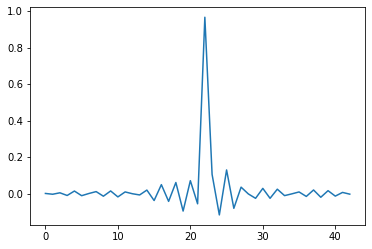

In [95]:
coeff=np.dot(linalg.pinv(transfer, 1.0e-12), G)
coeff
plt.figure()
plt.plot(coeff)
plt.show()

In [96]:
np.dot(transfer, coeff)-G

array([-1.63918337e-06, -1.71243007e-06, -1.81452838e-06, -1.78933682e-06,
       -1.38819856e-06, -9.22278487e-07, -6.19454466e-07, -3.52504065e-07,
       -2.01321932e-07, -8.30779859e-08, -3.04470965e-08, -1.78783877e-08,
       -1.87375834e-08, -2.40855579e-08, -3.00691521e-08, -3.37096530e-08,
       -3.56057119e-08, -3.60893585e-08, -3.64843135e-08, -3.77683173e-08,
       -4.09973099e-08, -4.68556889e-08, -5.09536131e-08, -5.48125919e-08,
       -6.36482202e-08, -6.96011207e-08, -7.04482601e-08, -6.77358643e-08,
       -6.15752723e-08, -5.16170512e-08, -4.20490122e-08, -3.87544066e-08,
       -4.45946518e-08, -6.25232109e-08, -9.59928877e-08, -2.23083120e-07,
       -3.36825825e-07, -4.79467865e-07, -9.39721834e-07, -1.63325510e-06,
       -2.07788560e-06, -2.55812041e-06, -3.03694789e-06])

In [97]:
result=np.sum([kernel(wGrid[wi], 0.0, beta)*coeff[wi] for wi in range(len(wGrid))])
expect=1.0/(1.0+np.exp(-E*beta))
print(result, expect)

0.9241401825731594 0.9241418199787566


In [99]:
linalg.solve(transfer, G)

array([ 2.97704103e-04, -8.17862044e-04,  1.62021915e-03, -5.27424049e-03,
        1.26204777e-02, -2.11784428e-02,  2.46255576e-02, -2.99475450e-02,
        2.59033026e-02, -2.63241552e-02,  3.90871170e-02, -3.63519728e-02,
        2.58115548e-02, -2.14267080e-02,  3.23205584e-02, -4.81058980e-02,
        5.46905233e-02, -4.27904657e-02,  5.79246585e-02, -8.93942534e-02,
        6.70917467e-02, -5.32908820e-02,  9.63565115e-01,  1.12428776e-01,
       -1.43631415e-01,  1.82053154e-01, -1.43535473e-01,  1.00543037e-01,
       -1.21801683e-01,  1.42104537e-01, -7.48423835e-02,  3.52315477e-02,
       -3.10701760e-02,  1.56740472e-02, -7.12630538e-03,  6.09468308e-03,
       -4.28768942e-03,  2.88106484e-03, -1.91522927e-03,  1.04284981e-03,
       -6.87388247e-04,  2.90522311e-04, -1.02585912e-04])

In [100]:
import scipy.linalg as slinalg
from scipy.linalg import lu_factor, lu_solve

In [101]:
lu, piv = lu_factor(transfer)

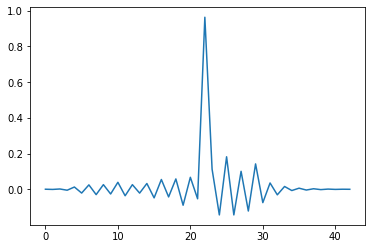

In [102]:
x = lu_solve((lu, piv), G)
x
plt.figure()
plt.plot(x)
plt.show()

In [103]:
transfer @ x - G

array([ 3.33066907e-16,  3.33066907e-16,  2.22044605e-16,  0.00000000e+00,
        3.33066907e-16,  4.44089210e-16,  3.33066907e-16,  2.22044605e-16,
        4.44089210e-16,  0.00000000e+00,  3.33066907e-16,  1.11022302e-16,
        1.11022302e-16,  2.22044605e-16,  1.11022302e-16,  2.22044605e-16,
       -1.11022302e-16,  0.00000000e+00, -5.55111512e-17, -5.55111512e-17,
        0.00000000e+00,  0.00000000e+00, -5.55111512e-17, -8.32667268e-17,
       -2.77555756e-17, -2.77555756e-17,  2.77555756e-17,  0.00000000e+00,
        0.00000000e+00, -1.38777878e-17, -2.77555756e-17,  0.00000000e+00,
       -1.38777878e-17, -1.38777878e-17,  0.00000000e+00,  2.77555756e-17,
        1.38777878e-17,  5.55111512e-17,  0.00000000e+00,  4.16333634e-17,
       -6.93889390e-17,  5.55111512e-17, -1.38777878e-17])